In [75]:
import torch
import wandb

api = wandb.Api()

runs = api.runs("pmin/crcns-train_net.py", 
                {"$and": 
                 [
                     {"config.single_cell": {"$gt" : -1}},
                     {"config.submodel": "xception2d"},
                     {"config.dataset": "pvc4"},
                     {"state": "finished"},
                ]
                }
               )

archives = {}
print("Found %i" % len(runs))
for i in runs:
    if i.config['single_cell'] in archives:
        continue
    print(i.config['single_cell'])
    print(i.summary['tune_corr'])
    
    # This restores the weights
    wandb.restore('model.pt', '/'.join(i.path), True)
    restored = torch.load('model.pt')
    archives[i.config['single_cell']] = {'tune_corr': i.summary['tune_corr'],
                                         'weights': restored}

Found 35
24
0.04004070535302162
23
0.24185840785503387
22
0.17340582609176636
21
0.1351379752159119
20
0.015181859023869038
19
0.25096848607063293
18
-0.011739731766283512
17
0.12968245148658752
16
0.3303099274635315
15
0.042528070509433746
14
0.13132330775260925
13
0.058095794171094894
12
0.28432026505470276
11
0.22232937812805176
10
0.29889947175979614
9
0.3992461562156677
8
0.005461160559207201
7
0.0816134363412857
6
0.31066060066223145
5
-0.026066577062010765
4
0.2140108346939087
3
0.17924673855304718
2
0.2892853021621704
1
0.35835644602775574
0
0.22452057898044583


(array([4., 3., 1., 3., 2., 3., 2., 4., 1., 2.]),
 array([-0.02606658,  0.0164647 ,  0.05899597,  0.10152724,  0.14405852,
         0.18658979,  0.22912106,  0.27165234,  0.31418361,  0.35671488,
         0.39924616]),
 <BarContainer object of 10 artists>)

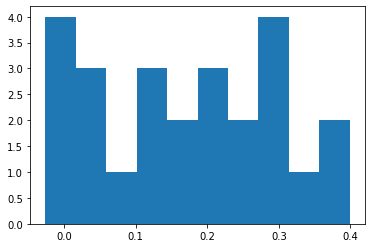

In [77]:
import matplotlib.pyplot as plt
plt.hist([x['tune_corr'] for x in archives.values()])

In [84]:
archives[0]['weights']['subnet.conv1.weight'].shape

torch.Size([8, 3, 7, 7])

In [94]:
import numpy as np

targets = sorted([(v['tune_corr'], v['weights']) for v in archives.values()])[:-17:-1]
ws = []
for _, vals in targets:
    idx = np.argsort(np.random.rand(8))[:4:]
    ws.append(vals['subnet.conv1.weight'][idx, :, :, :].cpu().detach().numpy())

W = np.concatenate(ws, axis=0)
np.save('pretrained/gaborpyramid2d.npy', W)

In [56]:
model_file.mode = 'rb'
model_file

<_io.TextIOWrapper name='D:\\Documents\\brain-scorer\\model.pt' mode='rb' encoding='cp1252'>

In [93]:
len(ws)

15

In [38]:
f = i.file('model.pt')
f.

{'_step': 0, '_runtime': 1, 'tune_corr': 0.04770519211888313, '_timestamp': 1608354193}